# Figure 2

NOTE: If you're running this on **Google Colab**, then uncomment and run the next two cells.

In [ ]:
# !git clone https://github.com/Mark-Kramer/Aperiodic-Exponent-Model.git

In [ ]:
# import sys
# sys.path.insert(0,'/content/Aperiodic-Exponent-Model')

---

## Load packages

In [1]:
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
from   matplotlib.backends.backend_pdf import PdfPages

## Load functions for computations and plotting

In [2]:
from one_over_f_functions import *

## Define the model

In [ ]:
# Simulate the generative model.
def HH_M(noise):
    
    I0=1; gM=4; EK=-95;         # Parameters for HH-type model
    
    N = 120000;
    dt = 0.01;
    
    V = np.zeros([N])                         # Output variables
    M = np.zeros([N])
    t = np.arange(N)*dt/1000                  # Time in [ms]
    
    V[0] = -70                                # Initial conditions
    M[0] = 0.0
    
    for n in np.arange(N-1):                  # Simulate the model
        aM     = 0.02 / (1+np.exp((-V[n]-20)/5))
        bM     = 0.01 *    np.exp((-V[n]-43)/18)
        V[n+1] = V[n] + dt*(I0 + gM*M[n]*(EK-V[n]) + noise["V"]*np.random.randn())
        M[n+1] = M[n] + dt*(aM*(1-M[n]) - bM*M[n]  + noise["M"]*np.random.randn())
    
    V = V[20000:]; M = M[20000:]              # Drop initial transient.
    t = t[20000:]-t[20000]                    # start time at 0 s.
    
    return V,M,t

## Figure 2A-D: Simulate the model, and plot it.

In [ ]:
noise = {"V":[],                           # Set the V noise,
         "M":0.01  }                       # ... and the M noise.
fig, ((ax1, ax2,), (ax3, ax4)) = plt.subplots(2, 2,figsize=(12, 6), dpi=80)

noise["V"]=0.0;                            # V noise = 0.
[V,M,t] = HH_M(noise)                      # Simulate model,
[S,f]   = compute_spectrum(V,t)            # ... compute the spectrum & fit aperiodic exponent.
[aperiodic_exponent, x_linear_fit, y_linear_fit] = estimate_aperiodic_exponent(S,f,[50,250])
make_plots(t,V, f,S, x_linear_fit,y_linear_fit,aperiodic_exponent, ax1,ax3);
ax1.set_ylim([-90, -30]); ax3.set_ylim([-20, 5]);

noise["V"]=20;                             # V noise > 0.
[V,M,t] = HH_M(noise)                      # Simulate model,
[S,f]   = compute_spectrum(V,t)            # ... compute the spectrum & fit aperiodic exponent.
[aperiodic_exponent, x_linear_fit, y_linear_fit] = estimate_aperiodic_exponent(S,f,[50,250])
make_plots(t,V, f,S, x_linear_fit,y_linear_fit,aperiodic_exponent, ax2,ax4);
ax2.set_ylim([-90, -30]); ax4.set_ylim([-20, 5]);

#fig.savefig("./PDFs/Figure-2ABCD.pdf", bbox_inches='tight')

## Figure 2E (Part 1): Iterate over values of noise and plot aperiodic exponent
This part is slow.

In [ ]:
noise = {"V":[],                                           # Prepare the noise variable.
         "M":0.01  }                                       # ... fix the M noise,
noise_values = np.arange(0.0,30.1, 1)                      # ... define range of V noises.
N_replicates = 100                                         # Number of times to repeat simulation.
aperiodic_exponents = np.zeros([np.size(noise_values), N_replicates])

for [count, V_noise] in enumerate(noise_values):           # For each V noise,
    noise["V"]=V_noise
    print("V_noise: %.4f" % V_noise)
    for j in np.arange(N_replicates):
        [V,M,t]= HH_M(noise)            # Simulate model N_replicate times,
        [S,f]  = compute_spectrum(V,t)                     # ... compute the spectrum,
        ae = estimate_aperiodic_exponent(S,f,[50,250])[0]  # ... fit aperiodic exponent,
        aperiodic_exponents[count, j] = ae                 # ... and save it.
                                                           # Save the results.
res = {"noise_values":noise_values, "aperiodic_exponents":aperiodic_exponents}
io.savemat(str('Figure-2E.mat'), res)

## Figure 2E (Part 2): Load the aperiodic exponent, and plot it.

This part is fast.

(0.0, 30.0)

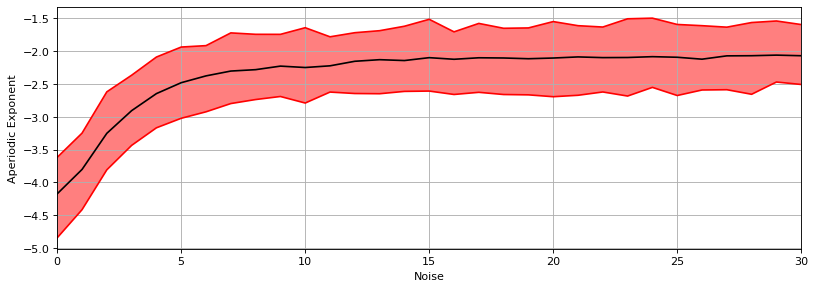

In [5]:
# Note: if you're running on Google Colab, then load the .mat file like this:
# res = io.loadmat("/content/Aperiodic-Exponent-Model/Figure-2E.mat");

# Or, if not running on Google Colab, then load the .mat file like this:
res = io.loadmat("Figure-2E.mat")

fig = plt.figure(figsize=(12, 4), dpi=80)
make_plot_ae_vs_noise(res); plt.xlim([0,30])

#fig.savefig("./PDFs/Figure-2E.pdf", bbox_inches='tight')